In [2]:
import pandas as pd

df = pd.read_csv("/Users/charvisaig/ev_charging_analysis/data/detailed_ev_charging_stations.csv")

df.head()

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/Users/charvisaig/ev_charging_analysis/data/detailed_ev_charging_stations.csv")

# Show basic info
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Remove duplicates (if any)
df = df.drop_duplicates()

# Clean column names for easier access
df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]

# Check unique charger types and availability
print("\nUnique Charger Types:", df.Charger_Type.unique())
print("\nUnique Operators:", df.Station_Operator.unique()[:10])  # first 10

# Preview
df.head()


Shape: (5000, 17)

Missing values:
 Station ID                     0
Latitude                       0
Longitude                      0
Address                        0
Charger Type                   0
Cost (USD/kWh)                 0
Availability                   0
Distance to City (km)          0
Usage Stats (avg users/day)    0
Station Operator               0
Charging Capacity (kW)         0
Connector Types                0
Installation Year              0
Renewable Energy Source        0
Reviews (Rating)               0
Parking Spots                  0
Maintenance Frequency          0
dtype: int64

Unique Charger Types: ['AC Level 2' 'DC Fast Charger' 'AC Level 1']

Unique Operators: ['EVgo' 'ChargePoint' 'Greenlots' 'Ionity' 'Tesla']


,Station_ID,Latitude,Longitude,Address,Charger_Type,Cost_USD/kWh,Availability,Distance_to_City_km,Usage_Stats_avg_users/day,Station_Operator,Charging_Capacity_kW,Connector_Types,Installation_Year,Renewable_Energy_Source,Reviews_Rating,Parking_Spots,Maintenance_Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


Average Cost per Operator:
 Station_Operator
Tesla          0.297988
Ionity         0.299703
EVgo           0.300240
ChargePoint    0.300807
Greenlots      0.302320
Name: Cost_USD/kWh, dtype: float64


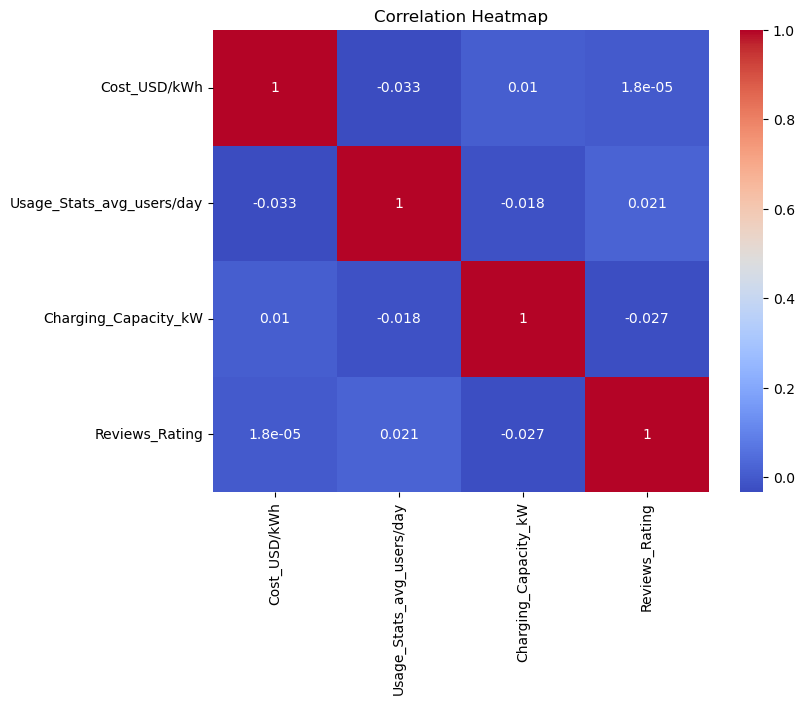

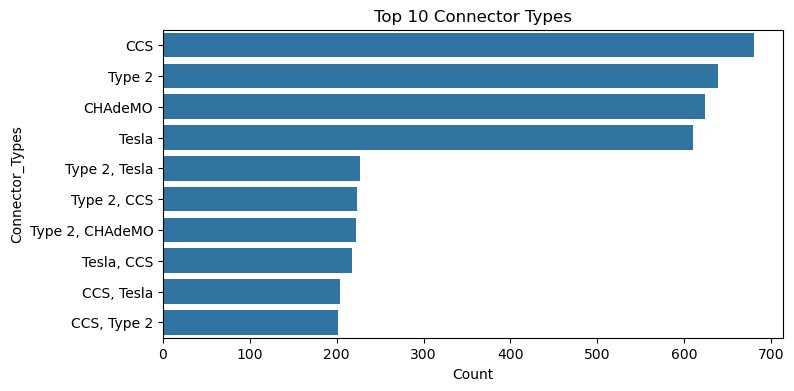

In [12]:
# Average cost per operator
avg_cost = df.groupby("Station_Operator")["Cost_USD/kWh"].mean().sort_values()
print("Average Cost per Operator:\n", avg_cost.head(10))

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[["Cost_USD/kWh", "Usage_Stats_avg_users/day", "Charging_Capacity_kW", "Reviews_Rating"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Most common connector types
connectors = df.Connector_Types.value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=connectors.values, y=connectors.index)
plt.title("Top 10 Connector Types")
plt.xlabel("Count")
plt.show()


In [13]:
df.to_csv("cleaned_ev_stations.csv", index=False)
print("✅ Cleaned data saved as 'cleaned_ev_stations.csv'")


✅ Cleaned data saved as 'cleaned_ev_stations.csv'


In [24]:
!python3 /Users/charvisaig/ev_charging_analysis/scripts/ev_etl.py


📥 Loading data...
Loaded 5000 rows.
Available columns: ['Station_ID', 'Latitude', 'Longitude', 'Address', 'Charger_Type', 'Cost_USD_kWh', 'Availability', 'Distance_to_City_km', 'Usage_Stats_avg_users_day', 'Station_Operator', 'Charging_Capacity_kW', 'Connector_Types', 'Installation_Year', 'Renewable_Energy_Source', 'Reviews_Rating', 'Parking_Spots', 'Maintenance_Frequency']
🧹 Cleaning data...
💾 Saving cleaned data...
✅ Saved: /Users/charvisaig/ev_charging_analysis/notebooks/cleaned_ev_stations.csv


In [25]:
import sqlite3

# Connect to local database
conn = sqlite3.connect("ev_stations.db")

# Load cleaned CSV into SQL table
df = pd.read_csv("cleaned_ev_stations.csv")
df.to_sql("ev_stations", conn, if_exists="replace", index=False)

print("✅ Data successfully loaded into SQLite database 'ev_stations.db'")


✅ Data successfully loaded into SQLite database 'ev_stations.db'


In [26]:
pd.read_sql("SELECT Station_Operator, AVG(Cost_USD_kWh) FROM ev_stations GROUP BY Station_Operator", conn)


,Station_Operator,AVG(Cost_USD_kWh)
0,ChargePoint,0.300807
1,EVgo,0.300240
2,Greenlots,0.302320
3,Ionity,0.299703
4,Tesla,0.297988


In [29]:
import pandas as pd
df = pd.read_csv("/Users/charvisaig/ev_charging_analysis/data/cleaned_ev_stations.csv")
print(df.columns.tolist())


['Station_ID', 'Latitude', 'Longitude', 'Address', 'Charger_Type', 'Cost_USD_kWh', 'Availability', 'Distance_to_City_km', 'Usage_Stats_avg_users_day', 'Station_Operator', 'Charging_Capacity_kW', 'Connector_Types', 'Installation_Year', 'Renewable_Energy_Source', 'Reviews_Rating', 'Parking_Spots', 'Maintenance_Frequency']
